In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [18]:
import numpy as np
nn_architecture = [
{"input_dim": 2, "output_dim": 2, "activation": "tanh"},
{"input_dim": 2, "output_dim": 1, "activation": "relu"}
]
def initialize_parameters(nn_architecture, seed=42):
    np.random.seed(seed)
    parameters = {}
    for i, layer in enumerate(nn_architecture):
        input_dim = layer["input_dim"]
        output_dim = layer["output_dim"]
        parameters[f"W{i+1}"] = np.random.randn(output_dim, input_dim) * 0.01
        parameters[f"b{i+1}"] = np.zeros((output_dim, 1))
    return parameters

parameters = initialize_parameters(nn_architecture)

In [19]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def activation_function(Z, activation):
    if activation == "sigmoid":
        return sigmoid(Z)
    elif activation == "relu":
        return relu(Z)
    else:
        raise Exception("Non-supported activation function")


In [20]:
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    A_curr = activation_function(Z_curr, activation)
    return A_curr, Z_curr

def full_forward_propagation(X, parameters, nn_architecture):
    memory = {}
    A_curr = X
    for i, layer in enumerate(nn_architecture):
        A_prev = A_curr
        activation = layer["activation"]
        W_curr = parameters[f"W{i+1}"]
        b_curr = parameters[f"b{i+1}"]
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activation)
        memory[f"A{i}"] = A_prev
        memory[f"Z{i+1}"] = Z_curr
    return A_curr, memory

X = np.array([[1], [2]])
A_curr, memory = full_forward_propagation(X, parameters, nn_architecture)


Exception: Non-supported activation function

In [21]:
def compute_cost(Y_hat, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat))
    return np.squeeze(cost)

Y = np.array([[1]])
cost = compute_cost(A_curr, Y)


C:\Users\Oswald\AppData\Local\Temp\ipykernel_9904\4132260512.py:3: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat))


In [23]:
def compute_dJ_dY(Y_hat, Y):
    m = Y.shape[1]
    dY_hat = -Y/Y_hat + (1-Y)/(1-Y_hat)
    return dY_hat

dY_hat = compute_dJ_dY(A_curr, Y)


C:\Users\Oswald\AppData\Local\Temp\ipykernel_9904\651635027.py:3: RuntimeWarning: divide by zero encountered in divide
  dY_hat = -Y/Y_hat + (1-Y)/(1-Y_hat)


In [22]:
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    m = A_prev.shape[1]
    if activation == "relu":
        dZ_curr = relu_backward(dA_curr, Z_curr)
    elif activation == "sigmoid":
        dZ_curr = sigmoid_backward(dA_curr, Z_curr)
    dW_curr = 1/m * np.dot(dZ_curr, A_prev.T)
    db_curr = 1/m * np.sum(dZ_curr, axis=1, keepdims=True)
    dA_prev = np.dot(W_curr.T, dZ_curr)
    return dA_prev, dW_curr, db_curr


In [24]:
def init_layers(nn_architecture, seed=42):
    np.random.seed(seed)
    params_values = []
    
    for idx, layer in enumerate(nn_architecture):
        input_dim = layer["input_dim"]
        output_dim = layer["output_dim"]
        weight_layer = np.random.randn(output_dim, input_dim) * 0.1
        bias_layer = np.zeros((output_dim, 1))
        layer_params = {"W": weight_layer, "b": bias_layer}
        params_values.append(layer_params)
        
    return params_values


def gradient_descent_nn(X, Y, nn_architecture, epochs, learning_rate):
    params_values = init_layers(nn_architecture, 2)
    
    for i in range(epochs):
        Y_hat, memory = full_forward_propagation(X.T, params_values, nn_architecture)
        cost = get_cost_value(Y_hat, Y.T)
        
        grads_values = full_backward_propagation(Y_hat, Y.T, memory, params_values, nn_architecture)
        
        params_values = update(params_values, grads_values, nn_architecture, learning_rate)
    
        if i % 100 == 0:
            print(f"Epoka: {i} - koszt: {cost}")
    
    return params_values

X = np.array([[1, 2], [2, 1], [-1, -2], [-2, -1]])
Y = np.array([[0, 1, 1, 0]])

params = gradient_descent_nn(X, Y, nn_architecture, 1000, 0.1)

print(params)


TypeError: list indices must be integers or slices, not str

In [ ]:
def gradient_descent(gradient, start, learn_rate, n_iter):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        vector += diff
    return vector


In [ ]:
def f(x, y):
    return (x+3*y)**3+2*x

def dfdx(x, y):
    return 9*(x+3*y)**2+2

def dfdy(x, y):
    return 27*(x+3*y)**2

In [ ]:
def backpropagation(learning_rate, max_iterations):
    w_x = np.random.randn()
    w_y = np.random.randn()
    b = np.random.randn()
    
    for i in range(max_iterations):
        x = np.random.uniform(0, 100)
        y = np.random.uniform(0, 100)
        
        z = w_x * x + w_y * y + b
        output = f(z)
        dL_doutput = 1
        dz_dw_x = x
        dz_dw_y = y
        dz_db = 1
        dL_dw_x = dL_doutput * dfdx(x, y) * dz_dw_x
        dL_dw_y = dL_doutput * dfdy(x, y) * dz_dw_y
        dL_db = dL_doutput * dz_db
        
        w_x -= learning_rate * dL_dw_x
        w_y -= learning_rate * dL_dw_y
        b -= learning_rate * dL_db
        
    x = np.random.uniform(0, 100)
    y = np.random.uniform(0, 100)
    z = w_x * x + w_y * y + b
    output = f(z)
    return output


In [ ]:
learning_rate = 0.01
max_iterations = 1000

result = backpropagation(learning_rate, max_iterations)

print("Minimum funkcji f(x,y) dla zakresu od 0 do 100 wynosi: ", result)


In [ ]:
#ANOTHER TRY

In [ ]:
%matplotlib inline  

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
from numpy import *


def f(x, y):
    r = sqrt(x**2 + y**2)
    return (x+3*y)**3. + 2*x


x = arange(1, 100, 1)
y = arange(1, 100, 1)
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
Z = (X+3*Y)**3. + 2*X    

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       rstride=1, cstride=1, alpha=0.8)

ax.set_zlim(-2.01, 2.01)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [ ]:
pip install sklearn

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

In [ ]:
def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=0.05,momentum=0.8):
    
    w = w_init
    w_history = w
    f_history = obj_func(w,extra_param)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*grad_func(w,extra_param) + momentum*delta_w
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,extra_param)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history

In [ ]:
def visualize_fw():
    xcoord = np.linspace(1.0,100.0,1.0)
    ycoord = np.linspace(1.0,100.0,1.0)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # All 2D points on the grid
    pts = pts.transpose()
    
    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')    

pts,f_vals = visualize_fw()

In [10]:
# Objective function
def f(w,extra=[]):
    return np.sum(w*w)

# Function to compute the gradient
def grad(w,extra=[]):
    return 2*w

# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
def visualize_learning(w_history):  
    
    # Make the function plot
    function_plot(pts,f_vals)
    
    # Plot the history
    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta') 
    
    # Annotate the point found at last iteration
    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):
        # Annotate with arrows to show history
        plt.annotate("",
                    xy=w, xycoords='data',
                    xytext=w_history[i+1,:], textcoords='data',
                    arrowprops=dict(arrowstyle='<-',
                            connectionstyle='angle3'))     
    
def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.05,0.2,0.5,0.8]
    momentum = [0,0.5,0.9]
    ind = 1
    
    # Iteration through all possible parameter combinations
    for alpha in momentum:
        for eta,col in zip(learning_rates,[0,1,2,3]):
            plt.subplot(3,4,ind)        
            w_history,f_history = gradient_descent(5,-1,w_init, f,grad,[],eta,alpha)
            
            visualize_learning(w_history)
            ind = ind+1
            plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
            if col==1:
                plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()

In [ ]:
solve_fw()


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definicja funkcji f(x,y)
def f(x, y):
    return (x + 3*y)**3 + 2*x

# Definicja pochodnych cząstkowych ∂f/∂x i ∂f/∂y
def df_dx(x, y):
    return 3*(x + 3*y)**2 + 2

def df_dy(x, y):
    return 9*(x + 3*y)**2

x = 1
y = 1

learning_rate = 0.001
epoch = 10000

xs = [x]
ys = [y]
fs = [f(x,y)]

for i in range(epoch):
    fx = f(x, y)
    dx = df_dx(x, y)
    dy = df_dy(x, y)

    x = x - learning_rate*dx
    y = y - learning_rate*dy

    xs.append(x)
    ys.append(y)
    fs.append(fx)

print("Minimum lokalne funkcji f(x,y) wynosi:", fx)
print("Dla x =", x, "i y =", y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = np.linspace(1, 100, 100)
y_vals = np.linspace(1, 100, 100)
x, y = np.meshgrid(x_vals, y_vals)

start_point = [50, 50]
learning_rate = 0.00001

def gradient_descent(start_point, learning_rate, num_iterations):
    x = start_point[0]
    y = start_point[1]
    z = f(x, y)
    for i in range(num_iterations):
    dx = df_dx(x, y)
    dy = df_dy(x, y)
    
    x -= learning_rate*dx
    y -= learning_rate*dy
    
    z = f(x, y)
    
    return x, y, z

num_iterations = 10000
x_min, y_min, z_min = gradient_descent(start_point, learning_rate, num_iterations)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, f(x, y), cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.view_init(elev=30, azim=120)
z_path = f(x_vals, y_vals)
path = np.array([x_min, y_min, z_min])
path = np.vstack([path]*len(z_path))
ax.plot(x_vals, y_vals, z_path, alpha=0.3, color='black')
ax.plot(path[:,0], path[:,1], path[:,2], color='red')
plt.show()

print("Wartość minimalna: ", z_min)
print("Miejsce minimalne: x=", x_min, " y=", y_min)


In [ ]:
import numpy as np

def gradient_descent(f, grad_f, start_point, learning_rate=0.01, epsilon=1e-6, max_iterations=1000):
    """
    Funkcja minimalizująca funkcję dwóch zmiennych metodą gradientów.
    f - funkcja celu
    grad_f - gradient funkcji celu
    start_point - punkt startowy algorytmu
    learning_rate - stała uczenia
    epsilon - tolerancja zbieżności
    max_iterations - maksymalna liczba iteracji
    """
    x = np.array(start_point, dtype=np.float64)
    for i in range(max_iterations):
        grad = grad_f(x)
        if np.linalg.norm(grad) < epsilon:
            break
        x -= learning_rate * grad.astype(np.float64)
    return x, f(x)

def f(x, y):
    return (x + 3 * y) ** 3 + 2 * x

def grad_f(x):
    return np.array([9 * (x[0] + 3 * x[1]) ** 2 + 2, 27 * (x[0] + 3 * x[1])], dtype=np.float64)

start_point = [50, 50]
x_min, f_min = gradient_descent(f, grad_f, start_point)

print("Minimum globalne funkcji f(x, y) = (x + 3y)^3 + 2 * x:")
print("x_min = ", x_min)
print("f_min = ", f_min)


In [ ]:
import numpy as np

def f(x):
    return (x[0] + 3 * x[1]) ** 3 + 2 * x[0]

def grad_f(x):
    return np.array([3 * (x[0] + 3 * x[1]) ** 2 + 2, 9 * (x[0] + 3 * x[1]) ** 2])

def gradient_descent(x0, alpha, eps, max_iter):
    x = x0
    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < eps:
            break
        x = x - alpha * grad
    return x

x0 = np.array([1, 1])
alpha = 0.01  
eps = 1e-6  
max_iter = 1000 

x_min = gradient_descent(x0, alpha, eps, max_iter)
print(f"Minimum funkcji: {f(x_min)}, dla x = {x_min[0]}, y = {x_min[1]}")


In [ ]:
#one more

In [ ]:
def f_1(x,y):
    return 

In [ ]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse
def sigmoid_activation(x):
	# compute the sigmoid activation value for a given input
	return 1.0 / (1 + np.exp(-x))
def sigmoid_deriv(x):
	# compute the derivative of the sigmoid function ASSUMING
	# that the input "x" has already been passed through the sigmoid
	# activation function
	return x * (1 - x)

In [ ]:
def predict(X, W):
	# take the dot product between our features and weight matrix
	preds = sigmoid_activation(X.dot(W))
	# apply a step function to threshold the outputs to binary
	# class labels
	preds[preds <= 0.5] = 0
	preds[preds > 0] = 1
	# return the predictions
	return preds

In [ ]:
def next_batch(X, y, batchSize):
	# loop over our dataset "X" in mini-batches, yielding a tuple of
	# the current batched data and labels
	for i in np.arange(0, X.shape[0], batchSize):
		yield (X[i:i + batchSize], y[i:i + batchSize])

In [ ]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2,
	cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))
# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]
# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.5, random_state=42)

In [ ]:
# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

In [ ]:
epochs=100
batch_size=32
alpha=0.01

In [ ]:
# loop over the desired number of epochs
for epoch in np.arange(0, epochs):
	# initialize the total loss for the epoch
	epochLoss = []
	# loop over our data in batches
	for (batchX, batchY) in next_batch(trainX, trainY, batch_size):
		# take the dot product between our current batch of features
		# and the weight matrix, then pass this value through our
		# activation function
		preds = sigmoid_activation(batchX.dot(W))
		# now that we have our predictions, we need to determine the
		# "error", which is the difference between our predictions
		# and the true values
		error = preds - batchY
		epochLoss.append(np.sum(error ** 2))
        # the gradient descent update is the dot product between our
		# (1) current batch and (2) the error of the sigmoid
		# derivative of our predictions
		d = error * sigmoid_deriv(preds)
		gradient = batchX.T.dot(d)
		# in the update stage, all we need to do is "nudge" the
		# weight matrix in the negative direction of the gradient
		# (hence the term "gradient descent" by taking a small step
		# towards a set of "more optimal" parameters
		W += -alpha * gradient
        	# update our loss history by taking the average loss across all
	# batches
	loss = np.average(epochLoss)
	losses.append(loss)
	# check to see if an update should be displayed
	if epoch == 0 or (epoch + 1) % 5 == 0:
		print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),
			loss))

In [ ]:
# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

In [ ]:
# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)
# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

In [ ]:
#one more

In [ ]:
arange(1,100,1)

In [13]:
%matplotlib inline  

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
from numpy import *


def f(x, y):
    return (x+3*y)**3+2*x


x = arange(1, 100, 1)
y = arange(1, 100, 1)
X, Y = meshgrid(x, y)
Z = (X+3*Y)**2+math.e**-x

In [ ]:
# Definicja pochodnych cząstkowych ∂f/∂x i ∂f/∂y
def df_dx(x, y):
    return 3*(x + 3*y)**2 + 2

def df_dy(x, y):
    return 9*(x + 3*y)**2

In [ ]:
def grad_descent2(f, gradf, init_t, alpha):
    EPS = 1e-5
    prev_t = init_t-10*EPS
    t = init_t.copy()
    
    max_iter = 1000
    iter = 0
    while norm(t - prev_t) > EPS and iter < max_iter:
        prev_t = t.copy()
        t -= alpha*gradf(t[0], t[1])
        print(t, f(t[0], t[1]), gradf(t[0], t[1]))
        iter += 1
    
    return t

In [ ]:
f(10., 8.)


Minimum of f(1.000, 1.000) = 16.368 within the bounds


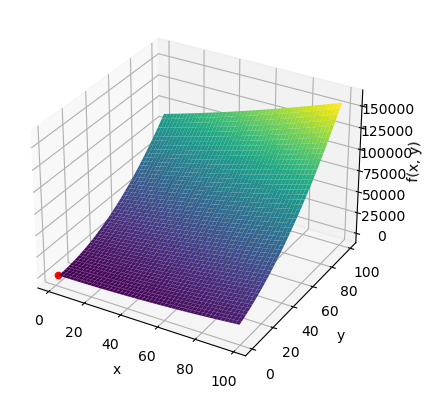

In [16]:
import numpy as np
import math

def gradient_descent_2d(f, grad, x0, y0, eta=0.01, max_iters=1000, tol=1e-6, xmin=-np.inf, xmax=np.inf, ymin=-np.inf, ymax=np.inf):
    """Gradient descent for 2D function f with gradient grad, starting from (x0, y0)"""
    x = x0
    y = y0
    for i in range(max_iters):
        grad_x = gradX(x, y)
        grad_y = gradY(x, y)
        x_new = x - eta * grad_x
        y_new = y - eta * grad_y
        
        if abs(f(x_new, y_new) - f(x, y)) < tol:
            break
            
        x = min(max(x_new, xmin), xmax)
        y = min(max(y_new, ymin), ymax)
    return x, y, f(x, y)

def f(x, y):
    return (x+3*y)**2+math.e**-x

def gradX(x, y):
    return 3*(x+3*y)**3+math.e**-x

def gradY(x, y):
    return 9*(x+3*y)**3+math.e**-x
 
# Example usage
x0, y0 = 1, 2
xmin, xmax = 1, 10
ymin, ymax = 1, 10
x_min, y_min, f_min = gradient_descent_2d(f, grad, x0, y0, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
print(f"Minimum of f({x_min:.3f}, {y_min:.3f}) = {f_min:.3f} within the bounds")


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Plot the minimum point
ax.scatter(x_min, y_min, f_min, c='r', marker='o')
plt.show()

In [ ]:
#zadanie 2

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
# model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="relu"))

In [ ]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=10, batch_size=128)

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
